# Aclaración de conceptos


- Cómo es una capa de convolucion:

<img src="convLayer1.png">
<img src="convLayer2.png">
<img src="convLayer3.png">
<img src="convLayer4.png">
<img src="convLayer5.png">
<img src="convLayer6.png">
<img src="convLayer7.png">

- Red neuronal:

<img src="fcLayer.png">

- Esquema de una red neuronal convolucional:

<img src="cnnClasificacion.png">


# Introducción a TensorFlow

- Tensor: generalización de los conceptos de escalar, vector y matriz.

<img src="tensores.jpg">

- Grafo computacional:

<img src="computationalGraph.png">

- Tensorflow:
 - Software libre (licencia Apache 2.0).
 - Desarrollado originalmente por el equipo de _Google Brain_
 - Libreria _open source_ para la computación numérica usando grafos de flujo de datos. Ideal para _machine learning_ y _deep learning_.
 
<img src="tensorflow1.png">
<img src="tensorflow2.png">
<img src="tensorflow3.png">
<img src="tensorflow4.png">
<img src="tensorflow5.jpg">
 
 

# Primer ejemplo de TensorFlow

In [1]:
# Multiplicación de dos numeros en TensorFlow

import tensorflow as tf

# Creamos nuestro grafo con las operaciones a realizar
a = tf.placeholder("float")
b = tf.placeholder("float")

y = tf.multiply(a, b)

# Creamos una Session para poder trabajar con nuestro grafo.
sess = tf.Session()

# Le pedimos a tensorflow que nos calcule y, para ello, debemos asignar los valores de a y b.
print(sess.run(y, feed_dict={a: 3, b: 3}))

sess.close()

9.0


# Explorando el dataset MNIST
- Disponible desde tensorflow.
- Contiene 55,000 ejemplos de entrenamiento y 10,000 ejemplos para test. Los dígitos tienen todos el mismo tamaño y estan centrados en la imagen. De modo que, cada ejemplo es representado por una matriz de 2 dimensiones de tamaño 28x28 con valores entre 0 y 1.

## Imagenes de entrenamiento

![mnist.train.xs](https://www.tensorflow.org/versions/master/images/mnist-train-xs.png)

## Labels de entrenamient

![mnist.train.ys](https://www.tensorflow.org/versions/master/images/mnist-train-ys.png)

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

# Con esta orden descargamos el dataset MNIST en el directorio donde esta el _notebook_, mediante el parametro one_hot=True,
# le pedimos a tensorflow que transforme las clases de los dígitos (0,1,2,3,4,5,6,7,8,9) a un vector con el mismo tamaño
# que el número de clases y con un 1 en la posicion correspondiente a la clase del dígito.

# Clase 0 => [1,0,0,0,0,0,0,0,0,0]
# Clase 5 => [0,0,0,0,0,1,0,0,0,0]
# Clase 9 => [0,0,0,0,0,0,0,0,0,1]

mnist = input_data.read_data_sets("./mnist/", one_hot=True)

# Cargamos los datos
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz



# Data shape

- Cada imagen tiene un tamaño de 784 (28x28).


In [3]:
print "x_train: ", x_train.shape
print "y_train: ", y_train.shape
print "x_test: ", x_test.shape
print "y_test: ", y_test.shape



x_train:  (55000, 784)
y_train:  (55000, 10)
x_test:  (10000, 784)
y_test:  (10000, 10)


# Visalización del dataset

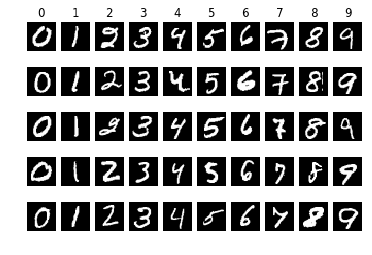

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_mnist(data, classes):
    
    for i in range(10):
        idxs = (classes == i)
        
        # get 10 images for class i
        images = data[idxs][0:10]
            
        for j in range(5):   
            plt.subplot(5, 10, i + j*10 + 1)
            plt.imshow(images[j].reshape(28, 28), cmap='gray')
            # print a title only once for each class
            if j == 0:
                plt.title(i)
            plt.axis('off')
            
    plt.show()

classes = np.argmax(y_train, 1)
plot_mnist(x_train, classes)

# Afrontemos el problema con una red neuronal

- Cálculo del error para una red con softmax => Usar cross-entropy:

<img src="crossEntropy.jpg">

- Estructura de nuestra red:

<img src="nn.png">

- En tensorflow:

 - Grafo:
![](https://www.tensorflow.org/versions/master/images/softmax-regression-scalargraph.png)

 - Operación:
![](https://www.tensorflow.org/versions/master/images/softmax-regression-vectorequation.png)

 - Esperamos obtener:
azules: pesos positivos, rojo: pesos negativos.
![](https://www.tensorflow.org/versions/master/images/softmax-weights.png)

In [5]:
import tensorflow as tf

# Creamos el modelo
x = tf.placeholder(tf.float32, [None, 784]) # None permite poder suministrar cualquier valor en la dimensión que se encuentra
W = tf.Variable(tf.zeros([784, 10])) # Inicializamos todos los pesos a 0
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b # Predicción de nuestro modelo

y_ = tf.placeholder(tf.float32, [None, 10]) # Salida esperada


# Definimos el error
cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

# Un paso en el entrenamiento consistirá en decirle a tf que minimice el cross_entropy usando el gradient descent
# Calculará la salida de la red y ajustará los valores de los pesos gracias al backpropagation.
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cross_entropy)

# Preparamos tensorflow para realizar el entrenamiento
sess = tf.InteractiveSession()

# Antes de comenzar es necesario inicializar todas las variables que hayan en el grafo.
sess.run(tf.global_variables_initializer())
  
# Entrenamiento
for i in range(1001):
    
    batch_xs, batch_ys = mnist.train.next_batch(100)
    loss, _ = sess.run([cross_entropy, train_step], feed_dict={x: batch_xs, y_: batch_ys})
    
    if i % 100 == 0:
        print("Loss it. " + str(i) + " = " + str(loss))

# Probamos el modelo entrenado sobre el conjunto de TEST
correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(y), 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print "Accuracy =", sess.run(accuracy, feed_dict={x: mnist.test.images,
y_: mnist.test.labels})



Loss it. 0 = 2.30259
Loss it. 100 = 0.428096
Loss it. 200 = 0.246036
Loss it. 300 = 0.314328
Loss it. 400 = 0.429943
Loss it. 500 = 0.353608
Loss it. 600 = 0.300348
Loss it. 700 = 0.547566
Loss it. 800 = 0.456533
Loss it. 900 = 0.426243
Loss it. 1000 = 0.322979
Accuracy = 0.9199


Imagen elegida: 


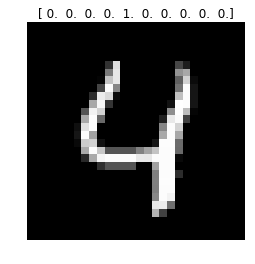

Clase predicha:  [4]
Salida de nuestro modelo:  [[ 0.0003573   0.00000177  0.00410978  0.00010177  0.95782745  0.00037524
   0.00302254  0.00591056  0.00534259  0.02295091]]


In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.set_printoptions(suppress=True)
# Prueba sobre una imagen concreta de test 
idx = 4

print "Imagen elegida: "
plt.imshow(mnist.test.images[idx,:].reshape(28, 28), cmap='gray')
plt.title(mnist.test.labels[idx, :])
plt.axis('off')
plt.show()

salidaModelo, prediccion = sess.run([tf.nn.softmax(y), tf.argmax(tf.nn.softmax(y), 1)],feed_dict={x: mnist.test.images[idx,:].reshape(1,784),
y_: mnist.test.labels[idx, :].reshape(1,10)} )

print "Clase predicha: ", prediccion
print "Salida de nuestro modelo: ", salidaModelo


# Podemos mejorar los resultados si utilizamos una red neuronal convolucional: _LeNet5_*

- Vamos a probar una modificación de esta red para mejorar los resultados


In [8]:
def deepnn(x):
    """

    Args:
    x: an input tensor with the dimensions (N_examples, 784), where 784 is the
    number of pixels in a standard MNIST image.

    Returns:
    A tuple (y, keep_prob). y is a tensor of shape (N_examples, 10), with values
    equal to the logits of classifying the digit into one of 10 classes (the
    digits 0-9). keep_prob is a scalar placeholder for the probability of
    dropout.
    """
    
    # Reshape to use within a convolutional neural net.
    # Last dimension is for "features" - there is only one here, since images are
    # grayscale -- it would be 3 for an RGB image, 4 for RGBA, etc.
    with tf.name_scope('reshape'):
        x_image = tf.reshape(x, [-1, 28, 28, 1])

    # First convolutional layer - maps one grayscale image to 32 feature maps.
    with tf.name_scope('conv1'):
        W_conv1 = weight_variable([5, 5, 1, 32])
        b_conv1 = bias_variable([32])
        h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

    # Pooling layer - downsamples by 2X.
    with tf.name_scope('pool1'):
        h_pool1 = max_pool_2x2(h_conv1)

    # Second convolutional layer -- maps 32 feature maps to 64.
    with tf.name_scope('conv2'):
        W_conv2 = weight_variable([5, 5, 32, 64])
        b_conv2 = bias_variable([64])
        h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

    # Second pooling layer.
    with tf.name_scope('pool2'):
        h_pool2 = max_pool_2x2(h_conv2)

    # Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
    # is down to 7x7x64 feature maps -- maps this to 1024 features.
    with tf.name_scope('fc1'):
        W_fc1 = weight_variable([7 * 7 * 64, 1024])
        b_fc1 = bias_variable([1024])

        h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
        h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    # Dropout - controls the complexity of the model, prevents co-adaptation of
    # features.
    #with tf.name_scope('dropout'):
    #    keep_prob = tf.placeholder(tf.float32)
    #    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    # Map the 1024 features to 10 classes, one for each digit
    with tf.name_scope('fc2'):
        W_fc2 = weight_variable([1024, 10])
        b_fc2 = bias_variable([10])

        #y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
        y_conv = tf.matmul(h_fc1, W_fc2) + b_fc2
        
        return y_conv#, keep_prob


def conv2d(x, W):
    """conv2d returns a 2d convolution layer with full stride."""
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    """max_pool_2x2 downsamples a feature map by 2X."""
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME') # strides indica el paso del kernel por cada dimension.


def weight_variable(shape):
    """weight_variable generates a weight variable of a given shape."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    """bias_variable generates a bias variable of a given shape."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


In [8]:
sess.close()

# Create the model
x = tf.placeholder(tf.float32, [None, 784])

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

# Build the graph for the deep net
y_conv = deepnn(x)

with tf.name_scope('loss'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_,
                                                        logits=y_conv)
    cross_entropy = tf.reduce_mean(cross_entropy)

with tf.name_scope('adam_optimizer'):
    train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)

with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(y_conv), 1), tf.argmax(y_, 1))
    correct_prediction = tf.cast(correct_prediction, tf.float32)
    accuracy = tf.reduce_mean(correct_prediction)

    
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(2001):

    batch_xs, batch_ys = mnist.train.next_batch(64)

    if i % 10 == 0:
        train_accuracy = sess.run(accuracy, feed_dict={x: batch_xs, y_: batch_ys})
        train_cross_entropy = sess.run(cross_entropy, feed_dict={x: batch_xs, y_: batch_ys})

        print('step %d, training accuracy %g, training loss %g' % (i, train_accuracy, train_cross_entropy))

    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

print('test accuracy %g' % sess.run(accuracy, feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

step 0, training accuracy 0.09375, training loss 11.3822
step 10, training accuracy 0.25, training loss 3.31112
step 20, training accuracy 0.4375, training loss 1.67264
step 30, training accuracy 0.71875, training loss 0.880312
step 40, training accuracy 0.625, training loss 1.00942
step 50, training accuracy 0.796875, training loss 0.596609
step 60, training accuracy 0.890625, training loss 0.531125
step 70, training accuracy 0.828125, training loss 0.534666
step 80, training accuracy 0.703125, training loss 0.803484
step 90, training accuracy 0.75, training loss 0.704864
step 100, training accuracy 0.8125, training loss 0.408018
step 110, training accuracy 0.875, training loss 0.3892
step 120, training accuracy 0.890625, training loss 0.392752
step 130, training accuracy 0.828125, training loss 0.491598
step 140, training accuracy 0.890625, training loss 0.406494
step 150, training accuracy 0.78125, training loss 0.605432
step 160, training accuracy 0.828125, training loss 0.428715
s

Imagen elegida: 


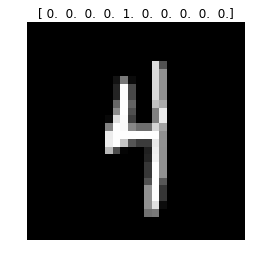

Clase predicha:  [4]
Salida de nuestro modelo:  [[ 0.00001222  0.00008962  0.0000054   0.00004258  0.9920277   0.00033867
   0.0002621   0.00004732  0.00065776  0.00651666]]


In [9]:
np.set_printoptions(suppress=True)
# Prueba sobre una imagen concreta de test 
idx = 65

print "Imagen elegida: "
plt.imshow(mnist.test.images[idx,:].reshape(28, 28), cmap='gray')
plt.title(mnist.test.labels[idx, :])
plt.axis('off')
plt.show()

salidaModelo, prediccion = sess.run([tf.nn.softmax(y_conv), tf.argmax(tf.nn.softmax(y_conv), 1)],feed_dict={x: mnist.test.images[idx,:].reshape(1,784),
y_: mnist.test.labels[idx, :].reshape(1,10)} )

print "Clase predicha: ", prediccion
print "Salida de nuestro modelo: ", salidaModelo